<a href="https://colab.research.google.com/github/Nattapat140/DM2025-Lab2-Exercise/blob/main/DM2025-Lab2-Master-Phase_2_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Colab Environment Setup**

In [1]:
# Clone Lab 2's github repository to get all of our material first

!git clone https://github.com/difersalest/DM2025-Lab2-Exercise.git

fatal: destination path 'DM2025-Lab2-Exercise' already exists and is not an empty directory.


In [2]:
# Installing all of our dependencies
# The lab in colab was tested with this, and everything should work as intended
# If in your case something is not working please notify the TAs
!pip3 install python-dotenv==1.1.1 google-genai==1.33.0 langextract==1.0.9 langchain==0.3.27 langchain_community==0.3.29 langchain_core==0.3.75 langchain-google-genai==2.1.10 beautifulsoup4==4.13.5 chromadb==1.0.20 gradio==5.44.1 jupyter==1.1.1 scikit-learn==1.7.1 pandas==2.3.2 numpy==1.26.4 matplotlib==3.10.6 plotly==6.3.0 seaborn==0.13.2 nltk==3.9.1 umap-learn==0.5.9.post2 pymupdf==1.26.4

In [3]:
# test code for environment setup
# import library
import dotenv
from google import genai
import langextract
import langchain
from langchain_community import utils
from langchain_core import prompts
from langchain_google_genai import chat_models
from bs4 import BeautifulSoup
import chromadb
import gradio
import jupyter
import sklearn
import pandas
import numpy
import matplotlib
import plotly
import seaborn
import nltk
import umap
import pymupdf

%matplotlib inline

##### **OPTIONAL: If you want to save your outputs you can send them to your own drive by mounting the drive in the following way (uncomment the lines):**

In [4]:

# Remember to change the directory of your outputs to your folder in the new mounted google drive inside colab
# from google.colab import drive
# drive.mount('/content/drive/')


**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 2](#toc1_)    
  - [Before Starting](#toc1_1_)    
  - [Introduction](#toc1_2_)    
  - [**1. Data Preparation**](#toc1_3_)    
  - [**1.1 Load data**](#toc1_4_)    
    - [**1.2 Save data**](#toc1_4_1_)    
  - [**2. Large Language Models (LLMs)**](#toc1_5_)    
    - [Open-Source vs. Proprietary LLMs](#toc1_5_1_)    
    - [Why Use Code (API) for Data Mining?](#toc1_5_2_)    
    - [The Gemini API](#toc1_5_3_)    
    - [Interacting with the Gemini API](#toc1_5_4_)    
    - [**2.1 Text Prompting**](#toc1_5_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_5_1_1_)    
    - [**2.2 Structured Output**](#toc1_5_6_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_5_6_1_1_)    
    - [**2.3 Information Extraction and Grounding:**](#toc1_5_7_)    
      - [**`langextract`: A Library for Grounded Extraction**](#toc1_5_7_1_)    
        - [**2.3.1 Using PDF Documents:**](#toc1_5_7_1_1_)    
        - [**>>> Bonus Exercise 3 (Take home):**](#toc1_5_7_1_2_)    
    - [**2.4 Generating LLM Embeddings:**](#toc1_5_8_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_5_8_1_1_)    
    - [**2.5 Retrieval-Augmented Generation (RAG)**](#toc1_5_9_)    
        - [**Actual answer in the URL:**](#toc1_5_9_1_1_)    
        - [**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc1_5_9_1_2_)    
        - [**>>> Bonus Exercise 5 (Take home):**](#toc1_5_9_1_3_)    
    - [**2.6 Few-Shot Prompting Classification:**](#toc1_5_10_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_5_10_1_1_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_5_10_1_2_)    
    - [**2.7 Extra LLM Related Materials:**](#toc1_5_11_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# Data Mining Lab 2 - Phase 2
In this lab's phase 2 session we will focus on exploring some basic LLMs' applications with data.


## Before Starting

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](https://drive.google.com/uc?export=view&id=1qurztXdx30Wl2vkCZg7KXXJYJXcE6YR_)

---
## **1. Data Preparation**

---
## **1.1 Load data**

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [5]:
import pandas as pd

### training data
anger_train = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [6]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [7]:
### testing data
anger_test = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [8]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [9]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### **1.2 Save data**

In [10]:
# save to pickle file
train_df.to_pickle("./DM2025-Lab2-Exercise/data/train_df.pkl")
test_df.to_pickle("./DM2025-Lab2-Exercise/data/test_df.pkl")

In [11]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./DM2025-Lab2-Exercise/data/train_df.pkl")
test_df = pd.read_pickle("./DM2025-Lab2-Exercise/data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
## **2. Large Language Models (LLMs)**

Before we start we strongly suggest that you watch the following video explanations so you can understand the concepts that we are gonna discuss about LLMs:

1. [How Large Language Models Work](https://www.youtube.com/watch?v=5sLYAQS9sWQ)
2. [Large Language Models explained briefly](https://www.youtube.com/watch?v=LPZh9BOjkQs)
3. [What is Prompt Tuning?](https://www.youtube.com/watch?v=yu27PWzJI_Y)
4. [Why Large Language Models Hallucinate](https://www.youtube.com/watch?v=cfqtFvWOfg0)
5. [What are LLM Embeddings?](https://www.youtube.com/watch?v=UShw_1NbpCw&t=182s)
6. [What is Retrieval-Augmented Generation (RAG)?](https://www.youtube.com/watch?v=T-D1OfcDW1M)
7. [RAG vs Fine-Tuning vs Prompt Engineering: Optimizing AI Models](https://www.youtube.com/watch?v=zYGDpG-pTho)
8. [Discover Few-Shot Prompting | Google AI Essentials](https://www.youtube.com/watch?v=9qdgEBVkWR4)
9. [What is Zero-Shot Learning?](https://www.youtube.com/watch?v=pVpr4GYLzAo)
10. [Zero-shot, One-shot and Few-shot Prompting Explained | Prompt Engineering 101](https://www.youtube.com/watch?v=sW5xoicq5TY)

`These videos can help you get a better grasp on the core concepts of LLMs if you were not familiar before.`

**So now let's start with the main content of Lab 2 Phase 2.**

Large Language Models (LLMs) are AI systems trained on vast amounts of text to understand and generate human language for tasks like summarization and translation.

### Open-Source vs. Proprietary LLMs
*   **Open-Source Models** (e.g., Llama, Gemma) are customizable and cost-effective but require technical skill to manage and may be less powerful.
*   **Proprietary Models** (e.g., Gemini, ChatGPT) offer top performance and ease of use but are more costly and less flexible.

For students interested in running models locally, the optional notebook `DM2025-Lab2-Optional-Ollama.ipynb` explores using Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)). It needs a capable GPU to run models (**at least 4GB VRAM**).

You can explore the variety of models available through Ollama here:

![pic10.png](https://drive.google.com/uc?export=view&id=1ZvD7_yeSCETl98vXI5zo_TikF6Wpu0-r)

### Why Use Code (API) for Data Mining?

For data analysis, accessing LLMs programmatically is superior to using web chatbots because it allows for:
*   **Automation:** Easily process entire datasets with loops.
*   **Structured Output:** Receive data in usable formats like **JSON**, ready for analysis in tools like pandas.
*   **Reproducibility:** Ensure consistent results by setting fixed parameters.
*   **Privacy:** Maintain data security, especially when running models locally.

For the main exercises in this lab, we will use **the Gemini API**. This approach offers several advantages over running local open-source models, such as access to state-of-the-art model performance without needing specialized hardware. While the API has usage limits (rate limits and token quotas), it provides a generous **free tier** that is more than sufficient for our exercises.

![pic13.png](https://drive.google.com/uc?export=view&id=1UGHgSyH2-m2ZdjJXJ39_8RCgZov2z94d)

![pic14.png](https://drive.google.com/uc?export=view&id=1D0Q5KpS5bNIH8er0kb8SWt1nZJhfufWa)

### The Gemini API

We will primarily use the **Gemini 2.5 Flash-Lite** (`gemini-2.5-flash-lite`) model. As shown in the rate limit table, this model is optimized for high-frequency tasks and offers a high request-per-day limit of 1,000, making it ideal for completing the lab exercises without interruption.

Students are encouraged to explore other models available through the API but should remain mindful of their respective usage limits. For instance:
*   **Gemini 2.5 Pro** is a more powerful model but has a lower daily request limit of 100.
*   The **Gemma 3** model available via the API offers an impressive 14,400 requests per day, providing another excellent alternative for experimentation.

Please be aware of your usage limits as you work through the exercises to ensure you do not get rate-limited.

[Gemini Documentation](https://ai.google.dev/gemini-api/docs)

[Gemini Rate Limits](https://ai.google.dev/gemini-api/docs/rate-limits)

[Description of Gemini Models](https://ai.google.dev/gemini-api/docs/models)

---

### Interacting with the Gemini API

The code cell below contains the primary function, `prompt_gemini`, that we will use throughout this lab to communicate with the Gemini API. It's designed to be a flexible wrapper that handles the details of sending a request and receiving a response.

Before you run the exercises, here are the key things you need to understand in this setup:

*   **API Key Configuration**: The script loads your API key from a `.env` file located in the `./config/` directory. **You must create this file and add your API key** like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`. This is a security best practice to keep your credentials out of the code.

*   **Global Settings**: At the top of the script, you can find and modify several important defaults:
    *   `MODEL_NAME`: We've set this to `"gemini-2.5-flash-lite"`, but you can easily switch to other models like `"gemini-2.5-pro"` to experiment.
    *   `SYSTEM_INSTRUCTION`: This sets the model's default behavior or persona (e.g., "You are a helpful assistant"). You can customize this for different tasks.
    *   `SAFETY_SETTINGS`: For our academic exercises, these are turned off to prevent interference. In real-world applications, you would configure these carefully.

*   **The `prompt_gemini` function**: This is the main tool you will use. Here are its most important parameters:
    *   `input_prompt`: The list of contents (text, images, etc.) you want to send to the model.
    *   `temperature`: Controls the randomness of the output. `0.0` makes the output deterministic and less creative, while a higher value (e.g., `0.7`) makes it more varied.
    *   `schema`: A powerful feature that allows you to specify a JSON format for the model's output. This is extremely useful for structured data extraction.
    *   `with_tokens_info`: If set to `True`, the function will also return the number of input and output tokens used, which is helpful for monitoring your usage against the free tier limits.

In the following exercises, you will call this function with different prompts and configurations to solve various tasks.

If needed, you can also check some tutorials on how a python function works: [Python Functions Tutorial](https://realpython.com/defining-your-own-python-function/)

In [12]:
import os
from google.colab import userdata
from google import genai
from google.genai import types


# System instruction that can dictate how the model behaves in the output, can be customized as needed
SYSTEM_INSTRUCTION = (
        "You are a helpful assistant"
    )

# Max amount of tokens that the model can output, the Gemini 2.5 Models have this maximum amount
# For other models need to check their documentation
MAX_OUTPUT_TOKENS = 65535
MODEL_NAME = "gemini-2.5-flash-lite" # Other models: "gemini-2.5-pro", "gemini-2.5-flash"; Check different max output tokens: "gemini-2.0-flash" , "gemini-2.0-flash-lite"

# We disable the safety settings, as no moderation is needed in our tasks
SAFETY_SETTINGS = [
    types.SafetySetting(
        category="HARM_CATEGORY_HATE_SPEECH", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_SEXUALLY_EXPLICIT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_HARASSMENT", threshold="OFF")
]

# We input the API Key to be able to use the Gemini models
api_key = userdata.get('GOOGLE_API_KEY')
os.environ["GOOGLE_API_KEY"] = api_key
client = genai.Client(api_key=api_key)

# We also set LangExtract to use the API key as well:
if 'GEMINI_API_KEY' not in os.environ:
    os.environ['GEMINI_API_KEY'] = api_key

def prompt_gemini(
        input_prompt: list,
        schema = None,
        temperature: float = 0.0,
        system_instruction: str = SYSTEM_INSTRUCTION,
        max_output_tokens: int = MAX_OUTPUT_TOKENS,
        client: genai.Client = client,
        model_name: str = MODEL_NAME,
        new_config: types.GenerateContentConfig = None,
        with_tools: bool = False,
        with_parts: bool = False,
        with_tokens_info: bool = False
    ):
        try:
            # If we need a JSON schema we set up the following
            if schema:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    response_mime_type="application/json",
                    response_schema=schema,
                    safety_settings=SAFETY_SETTINGS
                )
            # If there is no need we leave it unstructured
            else:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    safety_settings=SAFETY_SETTINGS
                )

            # We add a different custom configuration if we need it
            if new_config:
                generate_content_config = new_config

            # For some tasks we need a more specific way to add the contents when prompting the model
            # So we need custom parts for it sometimes from the "types" objects
            if with_parts:
                response = client.models.generate_content(
                    model=model_name,
                    contents=types.Content(parts=input_prompt),
                    config=generate_content_config,
                )
            # In the simplest form the contents can be expressed as a list [] of simple objects like str and Pillow images
            else:
                response = client.models.generate_content(
                    model=model_name,
                    contents=input_prompt,
                    config=generate_content_config,
                )

            if with_tools:
                # print(response)
                # Include raw response when function calling
                completion = response
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    return completion, log
                return completion
            else:
                completion = response.text
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    # Return the text response and logs (if selected)
                    return completion, log
                return completion
        except Exception as e:
             print(f"Error occurred when generating response, error: {e}")
             return None

---
### **2.1 Text Prompting**

In the same way as with ChatGPT we can use the Gemini models to ask about anything. Here we are going to ask a question requesting the response to be in markdown format, this is to make it have a better display afterwards.

For more information visit:
[Gemini's Text Generation Documentation](https://ai.google.dev/gemini-api/docs/text-generation)

In [13]:
input_prompt = ["What is Data Mining?"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
print(text_response)

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strat

We can also check the logs of the usage with our model that we defined in our previous function. We can observe the model we used, how many tokens where in the prompt in the input, and the output text response tokens of our model.

In [14]:
print(logs)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 12, 'output_tokens': 911}


**We can use the IPython library to make the response look better:**

In [15]:
from IPython.display import display, Markdown
display(Markdown(text_response))

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strategic planning.

**How it Works (The Process):**

Data mining is usually an iterative process that involves several stages:

1.  **Business Understanding:** Defining the problem or objective you want to achieve with data mining. What questions are you trying to answer? What business goals are you trying to meet?
2.  **Data Understanding:** Exploring and getting familiar with the data. This involves collecting, cleaning, and understanding the data's structure, quality, and meaning.
3.  **Data Preparation (Preprocessing):** This is often the most time-consuming stage. It involves:
    *   **Cleaning:** Handling missing values, noisy data, and inconsistencies.
    *   **Integration:** Combining data from multiple sources.
    *   **Transformation:** Normalizing or aggregating data to make it suitable for mining.
    *   **Reduction:** Reducing the size of the dataset while preserving important information.
4.  **Modeling:** Selecting and applying appropriate data mining techniques (algorithms) to discover patterns. This is where the "mining" happens.
5.  **Evaluation:** Assessing the quality and usefulness of the discovered patterns. Do they make sense? Are they statistically significant? Do they meet the business objectives?
6.  **Deployment:** Putting the discovered knowledge into practice. This could involve integrating it into business processes, creating reports, or building predictive models.

**Common Data Mining Techniques:**

Data mining employs a variety of techniques, often drawing from statistics, machine learning, and database systems. Some of the most common include:

*   **Classification:** Categorizing data into predefined classes (e.g., predicting whether a customer will churn or not).
*   **Clustering:** Grouping similar data points together without predefined classes (e.g., segmenting customers into different groups based on their purchasing behavior).
*   **Association Rule Mining:** Discovering relationships between items in a dataset (e.g., "customers who buy bread also tend to buy milk"). This is often used in market basket analysis.
*   **Regression:** Predicting a continuous numerical value (e.g., predicting the price of a house based on its features).
*   **Anomaly Detection (Outlier Detection):** Identifying data points that deviate significantly from the norm (e.g., detecting fraudulent transactions).
*   **Sequential Pattern Mining:** Discovering patterns that occur in a sequence over time (e.g., identifying common user navigation paths on a website).

**Why is Data Mining Important?**

Data mining is crucial for businesses and organizations because it enables them to:

*   **Make Better Decisions:** By understanding customer behavior, market trends, and operational efficiencies, organizations can make more informed and strategic decisions.
*   **Improve Customer Relationships:** Identifying customer preferences and predicting their needs allows for personalized marketing, better customer service, and increased loyalty.
*   **Detect Fraud and Risk:** Anomaly detection can help identify fraudulent activities, security breaches, and potential risks.
*   **Optimize Operations:** Understanding patterns in operational data can lead to improved efficiency, reduced costs, and better resource allocation.
*   **Drive Innovation:** Discovering new insights can spark new product development, service offerings, and business models.
*   **Gain a Competitive Advantage:** Organizations that effectively leverage data mining can outperform their competitors by understanding their market and customers better.

In essence, data mining is a powerful tool for transforming raw data into valuable intelligence, driving progress and innovation across various fields.

---
##### **>>> Exercise 1 (Take home):**

`With your own prompt`, run the previous example in the following way:

1. Run it with the same model as the example (gemini-2.5-flash-lite).
2. Run it with a different gemini model from the available options for the API.
3. Discuss the differences on the results with different models.
4. Discuss what would happen if you change the system prompt.


In [16]:
# Answer here
MODEL_NAME = "gemini-2.5-flash-lite"
input_prompt = ["How can I be happy in life?"]
text_response_light, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True, model_name = MODEL_NAME)
print("Model: gemini-2.5-flash-lite\n")
display(Markdown(text_response_light))
print("-----------------\n")

MODEL_NAME = "gemini-2.5-pro"
input_prompt = ["How can I be happy in life?"]
text_response_pro, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True, model_name = MODEL_NAME)
print("Model: gemini-2.5-pro\n")
display(Markdown(text_response_pro))

Model: gemini-2.5-flash-lite



That's a question many people ponder, and the truth is, there's no single, universal answer. Happiness is a deeply personal and often evolving experience. However, there are many well-researched and commonly accepted strategies that can significantly contribute to a happier life.

Here's a breakdown of key areas to focus on:

**1. Cultivate Positive Relationships:**

*   **Nurture existing connections:** Invest time and effort in your relationships with family, friends, and partners. Deep, meaningful connections are a cornerstone of happiness.
*   **Be present:** When you're with loved ones, put away distractions and truly listen and engage.
*   **Practice gratitude for others:** Express your appreciation for the people in your life.
*   **Seek out positive people:** Surround yourself with individuals who uplift and support you.

**2. Practice Self-Care and Well-being:**

*   **Prioritize physical health:**
    *   **Exercise regularly:** Physical activity releases endorphins, which have mood-boosting effects.
    *   **Eat a balanced diet:** Nourishing your body impacts your mental state.
    *   **Get enough sleep:** Sleep deprivation can significantly affect mood and cognitive function.
*   **Nurture your mental health:**
    *   **Practice mindfulness and meditation:** These techniques can help you stay present, reduce stress, and increase self-awareness.
    *   **Manage stress:** Identify your stressors and develop healthy coping mechanisms.
    *   **Seek professional help when needed:** Don't hesitate to talk to a therapist or counselor if you're struggling with mental health challenges.
*   **Engage in activities you enjoy:** Make time for hobbies, passions, and activities that bring you joy and a sense of flow.

**3. Develop a Positive Mindset:**

*   **Practice gratitude:** Regularly acknowledge and appreciate the good things in your life, no matter how small. This shifts your focus from what's lacking to what you have.
*   **Challenge negative thoughts:** Become aware of your negative self-talk and actively try to reframe it into more balanced and positive perspectives.
*   **Focus on the present:** While it's good to learn from the past and plan for the future, dwelling on either can lead to unhappiness. Practice being present in the moment.
*   **Cultivate optimism:** Believe in your ability to overcome challenges and see the good in situations.

**4. Find Meaning and Purpose:**

*   **Identify your values:** What's truly important to you? Align your actions with your core values.
*   **Set meaningful goals:** Work towards goals that are personally significant and contribute to something larger than yourself.
*   **Contribute to something bigger:** Engage in activities that benefit others, whether through volunteering, helping a neighbor, or contributing to your community.
*   **Find purpose in your work (if possible):** If your job doesn't align with your passions, find ways to make it more meaningful or seek opportunities that do.

**5. Embrace Growth and Learning:**

*   **Be open to new experiences:** Step outside your comfort zone and try new things. This can lead to personal growth and a broader perspective.
*   **Continuously learn:** Read, take courses, or engage in activities that expand your knowledge and skills.
*   **Embrace challenges as opportunities:** View difficulties as chances to learn and grow stronger.

**6. Practice Self-Compassion:**

*   **Be kind to yourself:** Treat yourself with the same understanding and compassion you would offer a friend.
*   **Accept imperfections:** No one is perfect. Embrace your flaws and mistakes as part of the human experience.
*   **Forgive yourself:** Let go of past regrets and mistakes.

**Important Considerations:**

*   **Happiness is not a destination, but a journey:** It's not about achieving a permanent state of bliss, but about cultivating a life filled with moments of joy, contentment, and meaning.
*   **It's okay to not be happy all the time:** Life has its ups and downs. Experiencing a range of emotions is normal and healthy.
*   **Compare yourself to yourself, not others:** Social media can create unrealistic expectations. Focus on your own progress and journey.
*   **Experiment and find what works for you:** Not all strategies will resonate with everyone. Be willing to try different approaches and see what brings you the most happiness.

**To start, pick one or two areas that resonate with you and begin implementing small, consistent changes. The journey to happiness is a continuous process of self-discovery and intentional living.**

-----------------

Model: gemini-2.5-pro



That is one of the most important and beautiful questions a person can ask. It's a journey, not a destination, and the path is different for everyone. However, decades of research in psychology, neuroscience, and philosophy have shown that certain mindsets and practices consistently lead to a more fulfilling and happy life.

Think of happiness not as a single goal, but as a garden you tend. It requires regular effort in a few key areas. Here is a guide to tending that garden.

### Pillar 1: Cultivating Your Inner World (Mindset & Perspective)

This is your foundation. How you see the world and yourself determines a huge portion of your happiness.

1.  **Practice Gratitude:** This is the single most powerful and scientifically-backed tool. It retrains your brain to focus on what you have, not what you lack.
    *   **How to do it:** Every day, write down three specific things you are grateful for. "I'm grateful for the warm sun on my face during my walk this morning." "I'm grateful for the friend who sent me a funny text."

2.  **Embrace Mindfulness & Presence:** Happiness is rarely found in worrying about the future or ruminating on the past. It's found *right now*.
    *   **How to do it:** Take five minutes to focus on your breath. When you eat, just eat—notice the flavors and textures. When you walk, notice the feeling of your feet on the ground. This pulls you out of anxious thought loops and into the present moment.

3.  **Develop Self-Compassion:** Many of us are our own harshest critics. Self-compassion is treating yourself with the same kindness you would offer a good friend who is struggling.
    *   **How to do it:** When you make a mistake, instead of saying "I'm so stupid," try saying, "That was a difficult situation, and I did the best I could. It's okay to be imperfect."

4.  **Adopt a Growth Mindset:** See challenges not as threats, but as opportunities to learn and grow. Believing you can improve and adapt makes you resilient and more open to new experiences.
    *   **How to do it:** When you face a setback, ask "What can I learn from this?" instead of "Why does this always happen to me?"

### Pillar 2: Building Healthy Habits & Actions

Your daily actions are the seeds you plant in your garden.

1.  **Prioritize Physical Health:** The mind-body connection is undeniable. You cannot feel mentally well if you are physically depleted.
    *   **Move Your Body:** Aim for 30 minutes of moderate activity most days. It doesn't have to be intense; a brisk walk is fantastic for releasing endorphins and reducing stress.
    *   **Nourish Yourself:** Eat a balanced diet with plenty of whole foods. What you eat directly affects your mood and energy levels.
    *   **Get Enough Sleep:** Aim for 7-9 hours. Sleep is critical for emotional regulation and mental clarity. It's a non-negotiable.

2.  **Engage in "Flow" States:** A flow state is when you are so completely absorbed in a challenging but achievable activity that you lose track of time. This is a deep source of satisfaction.
    *   **How to find it:** This could be through a hobby (playing an instrument, painting, gardening), a sport, coding, or even becoming deeply engrossed in a project at work.

3.  **Spend Time in Nature:** Being outdoors has a proven restorative effect on our minds. It reduces stress, improves focus, and boosts our mood.
    *   **How to do it:** Go for a walk in a park, sit by a lake, or simply tend to a houseplant.

### Pillar 3: Nurturing Connection & Relationships

Humans are social creatures. Deep, meaningful connections are a fundamental predictor of long-term happiness.

1.  **Invest in Quality Relationships:** Focus on the depth, not the number, of your connections. Spend time with people who uplift you, support you, and allow you to be your authentic self.
    *   **How to do it:** Schedule regular time with loved ones. Put your phone away when you're with them. Practice active listening.

2.  **Practice Kindness & Generosity:** Giving to others—whether it's your time, a compliment, or a small gift—activates the pleasure centers in your brain. It connects you to something larger than yourself.
    *   **How to do it:** Volunteer for a cause you care about. Do a small, unexpected favor for a neighbor. Give a genuine compliment to a coworker.

### Pillar 4: Finding Purpose & Meaning

Happiness isn't just about feeling good; it's about living a life that feels meaningful.

1.  **Know Your Values:** What is most important to you in life? (e.g., creativity, honesty, security, adventure, community). When your actions align with your values, you feel a sense of integrity and peace.
    *   **How to do it:** Take some time to write down your top 5 core values. When making a big decision, ask yourself which option best aligns with those values.

2.  **Contribute to Something Bigger Than Yourself:** This is about moving beyond your own needs and wants. It could be through your work, your family, your community, or a creative project.
    *   **How to do it:** This doesn't mean you have to save the world. It can be as simple as being a reliable parent, a supportive mentor, or creating something that brings joy to others.

### What to Let Go Of (The Happiness Traps)

Sometimes, happiness is less about adding things and more about removing what's holding you back.

*   **Comparison:** Stop comparing your life to the curated "highlight reels" you see on social media. Your journey is your own.
*   **Perfectionism:** Striving for excellence is good; demanding perfection is a recipe for anxiety and disappointment. Embrace "good enough."
*   **External Validation:** Don't tie your self-worth to likes, promotions, or the approval of others. Cultivate an inner sense of validation.

**Final Thought:**

Be patient. Happiness is a practice, like learning an instrument. Some days you'll play beautifully, and other days you'll be out of tune. The key is to just keep practicing. Start small. Pick one thing from this list and try it for a week.

And most importantly, if you are struggling with persistent unhappiness, anxiety, or depression, please consider seeking help from a therapist or counselor. They can provide you with professional tools and support tailored to your specific needs.

In [17]:
# Discuss the differences on the results with different models.
"""
Let text1 = generated by gemini-2.5-flash-lite and text2 = by gemini-2.5-pro

With the same prompt: "How can I be happy in life?"
- Text1 uses a more formal outline format while Text2 uses a narrative and practical guide format, especially it
    includes explicit “How to do it” steps after most tips
- In terms of tone of voice, Text1 more neutral, structured, and academic.
    While, Text2 is more warm, conversational, and motivational like a coach.
    The reason why I bring up this topic to discusss because in the system prompt, I did not specify the tone of voice, and yet the text that are
    generated by both of them are quite different from each other.
- Lastly, in my opinion, they frame the word "Happiness" differently.
    Text1, frames happiness as: Personal, evolving, multifaceted. Not a destination but a set of supportive habits.
    Text2, frames happiness as more like a daily practice from inside with self-compassion and acceptance
"""

'\nLet text1 = generated by gemini-2.5-flash-lite and text2 = by gemini-2.5-pro\n\nWith the same prompt: "How can I be happy in life?"\n- Text1 uses a more formal outline format while Text2 uses a narrative and practical guide format, especially it\n    includes explicit “How to do it” steps after most tips\n- In terms of tone of voice, Text1 more neutral, structured, and academic.\n    While, Text2 is more warm, conversational, and motivational like a coach.\n    The reason why I bring up this topic to discusss because in the system prompt, I did not specify the tone of voice, and yet the text that are\n    generated by both of them are quite different from each other.\n- Lastly, in my opinion, they frame the word "Happiness" differently.\n    Text1, frames happiness as: Personal, evolving, multifaceted. Not a destination but a set of supportive habits.\n    Text2, frames happiness as more like a daily practice from inside with self-compassion and acceptance\n'

In [18]:
# Discuss what would happen if you change the system prompt.
SYSTEM_INSTRUCTION = (
        "You are a helpful assistant that explain in Gen-Z style, short and concise"
    )
MODEL_NAME = "gemini-2.5-flash-lite"
input_prompt = ["How can I be happy in life?"]
text_response_light, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True, model_name = MODEL_NAME, system_instruction = SYSTEM_INSTRUCTION)
print("Model: gemini-2.5-flash-lite\n")
display(Markdown(text_response_light))

"""
As I have added the system prompt to let the model explain shorter and more consise with Gen-Z Style. The result is pretty impressive,
    it became short and concise, also express in the informal way of Gen-Z

To be conclude, the model takes the system prompt as a must-followed rule. So I think that when we have to generate response repetitively,
    instead of specify in the input_prompt, we can setup in the system prompt instead
"""

Model: gemini-2.5-flash-lite



Yo, so like, happiness ain't a destination, it's more of a vibe. Here's the tea:

*   **Focus on the small wins:** That perfect avocado toast? That fire song? Cherish that.
*   **Vibe with your crew:** Good friends = good times, period.
*   **Do you, boo:** Pursue your passions, even if they're kinda weird.
*   **Be grateful:** Low-key appreciate what you got.
*   **Self-care is queen:** Sleep, eat well, move your body. It's not optional.
*   **Let go of the drama:** Toxic vibes ain't it.

Basically, find your joy, surround yourself with good energy, and don't stress the small stuff. You got this. ✨

'\nAs I have added the system prompt to let the model explain shorter and more consise with Gen-Z Style. The result is pretty impressive,\n    it became short and concise, also express in the informal way of Gen-Z\n\nTo be conclude, the model takes the system prompt as a must-followed rule. So I think that when we have to generate response repetitively,\n    instead of specify in the input_prompt, we can setup in the system prompt instead\n'

---
### **2.2 Structured Output**

By default, an LLM responds with unstructured, free-form text. For data mining, this is often impractical, as we need data in a predictable format to load into tools like a pandas DataFrame for analysis. **Structured output** is a powerful feature that forces the model to return its response in a specific, machine-readable format, such as JSON.

The key to enabling this is to provide the model with a **response schema**. This schema acts as a strict template or blueprint that the model's output must conform to. Instead of generating a paragraph, the model will fill in the fields defined in your schema with the relevant information it extracts from the prompt.

In the following code, we define this schema using Python classes. Think of each class as defining a JSON object:
*   The **attributes** of the class (e.g., `topic_name`, `sub_title`) become the keys in the final JSON object.
*   The **type hints** for those attributes (e.g., `str`, `list`) tell the model what kind of data is expected for each key's value.

We can even nest these classes inside one another to create complex, hierarchical JSON structures. This allows us to precisely control the format of the output, transforming the LLM from a simple text generator into a reliable tool for automated and structured data extraction.

[Gemini's Structured Output Documentation](https://ai.google.dev/gemini-api/docs/structured-output)

For data validation of schemas Gemini API uses the Pydantic library, for more documentation on it you can check: [Pydantic](https://docs.pydantic.dev/latest/)

[JSON Format Documentation](https://docs.python.org/3/library/json.html)

In [19]:
from pydantic import BaseModel

# We define our structure schema that Gemini should follow for the output response

# Subsections on the topics we query
class Subsection(BaseModel):
    sub_title: str
    sub_explanation: str

# The top-level structure for the entire topic analysis
class Topic(BaseModel):
    topic_name: str
    subsections: list[Subsection]

In [20]:
input_prompt = ["Explain what are machine learning, data centers, llms and how do they relate to each other."]
text_response = prompt_gemini(input_prompt = input_prompt, schema = list[Topic])
print(text_response)

[
  {
    "topic_name": "Machine Learning",
    "subsections": [
      {
        "sub_title": "Definition",
        "sub_explanation": "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."
      },
      {
        "sub_title": "Types of Machine Learning",
        "sub_explanation": "Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties)."
      },
      {
        "sub_title": "Applications",
        "sub_explanation": "ML is used in a wide range of applications, such as image recognition, natural language processing, recommend

In [21]:
import json

# Now the response can be parsed to a python object using the JSON dictionary structure loading
structured_resp = json.loads(text_response)
print(structured_resp)
print(type(structured_resp))

[{'topic_name': 'Machine Learning', 'subsections': [{'sub_title': 'Definition', 'sub_explanation': "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."}, {'sub_title': 'Types of Machine Learning', 'sub_explanation': 'Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties).'}, {'sub_title': 'Applications', 'sub_explanation': 'ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis.'}]}, {'topic_name': 'Data Centers', 'subs

In [22]:
# So now we have an object that we can explore/use in a pythonic way for our purposes
for topic in structured_resp:
    print(topic["topic_name"], "\n")
    # We can access each subsection as well
    for subsection in topic["subsections"]:
        print("\t", subsection["sub_title"], "\n")
        print("\t\t", subsection["sub_explanation"], "\n")


Machine Learning 

	 Definition 

		 Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention. 

	 Types of Machine Learning 

		 Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties). 

	 Applications 

		 ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis. 

Data Centers 

	 Definition 

		 A data center is a dedicated physical facility that an organization uses to house its critical IT infrastructure, including servers

##### **>>> Exercise 2 (Take home):**

Try a prompt with your own schema structure, it needs to be completely different to the example. It should show an intuitive way to represent the text output of the model based on the prompt you chose. See the documentation for reference: https://ai.google.dev/gemini-api/docs/structured-output

In [23]:
# Answer here
from typing import List, Optional
class bullet_points(BaseModel):
    bullet_points: str

# The top-level structure for the entire topic analysis
class Topic(BaseModel):
    keys_areas: str #this shows the main key-area
    number_of_bullet_points: Optional[int] #shows how many bullet points does each key_area has
    subsections: list[bullet_points] # explanation in bullet points

input_prompt = ["How can I be happy in life?"]
text_response = prompt_gemini(input_prompt = input_prompt, schema = list[Topic])
print(text_response)

[
  {
    "keys_areas": "Mindfulness and Presence",
    "number_of_bullet_points": 3,
    "subsections": [
      {
        "bullet_points": "Practice daily meditation or deep breathing exercises to stay grounded in the present moment."
      },
      {
        "bullet_points": "Engage fully in activities, savoring each experience without dwelling on the past or worrying about the future."
      },
      {
        "bullet_points": "Cultivate gratitude by regularly acknowledging the good things in your life, no matter how small."
      }
    ]
  },
  {
    "keys_areas": "Meaningful Connections",
    "number_of_bullet_points": 3,
    "subsections": [
      {
        "bullet_points": "Nurture strong relationships with family and friends through open communication and quality time."
      },
      {
        "bullet_points": "Engage in acts of kindness and compassion towards others, fostering a sense of community and belonging."
      },
      {
        "bullet_points": "Seek out and connect

---
### **2.3 Information Extraction and Grounding:**

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

When using LLMs to extract structured data from text, two main challenges arise:

1.  **Trust:** LLMs can "hallucinate" or invent information. We need to ensure the extracted data is accurate and comes directly from the source text.
2.  **Scalability:** We need a reliable way to extract complex information consistently from thousands of large, messy documents.

The solution to these challenges is **grounding**—the process of linking every piece of extracted data back to its specific origin in the source document. This creates a verifiable audit trail, building trust in the output.

---
#### **`langextract`: A Library for Grounded Extraction**

**`langextract`** is an open-source Python library from Google designed to create trustworthy data extraction pipelines. It uses LLMs to convert unstructured text into structured data with a focus on reliability and traceability.

**Key Features:**

*   **Precise Grounding:** Its core feature. It maps every extracted item to its exact character position in the original text, allowing for easy verification.
*   **Reliable Structured Output:** Uses examples (few-shot prompting) to ensure the LLM's output consistently follows a predefined format.
*   **Adaptable & No Fine-Tuning:** Can be adapted to any domain (e.g., legal, medical) simply by changing the examples and instructions, without needing to retrain a model.
*   **Handles Long Documents:** Built to process lengthy texts that might exceed an LLM's standard context window.
*   **Flexible LLM Support:** It is model-agnostic and works with various LLMs like Gemini, OpenAI models, and even local open-source models through Ollama.

**`Github repository:`** [langextract](https://github.com/google/langextract)

---

##### **2.3.1 Using PDF Documents:**

For PDF Document information extraction we are going to use the `pymupdf` library. Documentation: [pymupdf](https://pymupdf.readthedocs.io/en/latest/)

And then we are going to pass it on to langextract to get insights on the document's content.

We can also process documents using Gemini, for more information you can check their documentation: [Document Understanding](https://ai.google.dev/gemini-api/docs/document-processing)

In [24]:
import pymupdf
# Extract text from the PDF and format it for the prompt
# This is a review from the movie interstellar
pdf_path = "./DM2025-Lab2-Exercise/data/documents/doc_example_review_interstellar.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    # In case the PDF documents have more than one page, in this example it only has one
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."

✓ Extracted text from './DM2025-Lab2-Exercise/data/documents/doc_example_review_interstellar.pdf'


In [25]:
print(formatted_text)

**Page 1**
"""
Dan Baldwin
Group 4
Auteur Review - Interstellar 
I believe Christopher Nolan: the director behind the 2014 sci-ﬁ/adventure cinematic ‘Interstellar,’ 
to be a very intellectual and imaginative inventive talent.  
His style in his previous ﬁlms sets characters in epic unique locations, with gargantuan issues to 
face, and artistically impresses the audience with how the characters solve their problems. For 
example, in Nolan’s 2010 ﬁlm ‘Inception,’ he tackles the idea of dreams, and sets his characters 
diving through dreams within dreams within even more dreams to complete their goals. Because 
this idea is so farfetched, and dreams are a subject in which science has made little factual 
discovery in, Nolan is free to use his creativity to present ideas such as landscapes folding in on 
themselves and corridors spinning, without seeming unrealistic. 
This brain-racking epic theme is once again evident in ‘Interstellar,’ as Nolan sets his characters 
during a second Ameri

We define our prompt and examples based on our required type of data, in this case we are going to do it having `movie reviews` in mind.

In [33]:
import langextract as lx
import textwrap

# Defining the extraction prompt for "movie review" type of data
prompt = textwrap.dedent("""\
    Extract specific opinions and their impact on the audience from this movie review.
    Important: Use exact text verbatim from the input for extraction_text. Do not paraphrase.
    Extract entities in order of appearance with no overlapping text spans.

    Use the 'opinion_statement' class for direct judgments about film elements (like plot, score, or acting).
    - 'subject' should be the element being reviewed.
    - 'sentiment' should be Positive, Negative, or Neutral.
    - 'key_phrase' should be the core descriptive words.

    Use the 'audience_impact' class for phrases describing the effect on the viewer.
    - 'emotion_evoked' should be the feeling or reaction (e.g., stress, joy, confusion).
    - 'causal_element' is what part of the film caused the reaction.
    - 'target_audience' is who was affected (e.g., 'the audience', 'the reviewer').
    """)

# Providing high-quality examples to guide the model
# These examples show the model exactly how to differentiate between the two classes
examples = [
    # Example 1: Demonstrates a positive opinion on the plot and its direct impact on the reviewer
    lx.data.ExampleData(
        text="The film boasts a truly clever plot that kept me guessing until the very end.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="a truly clever plot",
                attributes={
                    "subject": "The plot",
                    "sentiment": "Positive",
                    "key_phrase": "truly clever"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="kept me guessing until the very end",
                attributes={
                    "emotion_evoked": ["engaged", "curious"],
                    "causal_element": "The plot",
                    "target_audience": "the reviewer"
                }
            ),
        ]
    ),
    # Example 2: Shows a negative opinion and a separate audience impact caused by the soundtrack
    lx.data.ExampleData(
        text="Unfortunately, the dialogue felt clunky and unnatural, and the jarring soundtrack made the audience jump.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="the dialogue felt clunky and unnatural",
                attributes={
                    "subject": "The dialogue",
                    "sentiment": "Negative",
                    "key_phrase": "clunky and unnatural"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="made the audience jump",
                attributes={
                    "emotion_evoked": ["startled", "on edge"],
                    "causal_element": "The soundtrack",
                    "target_audience": "the audience"
                }
            )
        ]
    )
]

Here we define our main function to call for langextract information extraction, note that there are some constants in the functions that we are not going to change for the example but it would be required to explore and understand in the exercise. In this function we obtain the resulting raw extracted information into a .jsonl file and the visualization into a .html file. Check the documentation for more information.

The files will be saved in the following directory: `results/info_extractions`

In [39]:
import os
import langextract as lx

# We define our main langextract function
def grounded_info_extraction(input_documents, prompt, examples, file_name, model_id ="gemini-2.5-flash-lite", extraction_passes = 1, max_workers = 5, max_char_buffer = 2000):
    result = lx.extract(
        text_or_documents=input_documents,
        prompt_description=prompt,
        examples=examples,
        model_id=model_id,
        extraction_passes=extraction_passes,    # Improves recall through multiple passes over the same text, needs temperature above 0.0
        max_workers=max_workers,         # Parallel processing for speed, remember there are API call rate limits, so do not abuse
        max_char_buffer=max_char_buffer    # Smaller contexts for better accuracy, currently: 1000 characters per batch
    )

    # Display results
    print(f"Extracted {len(result.extractions)} entities:\n")
    for extraction in result.extractions:
        print(f"• {extraction.extraction_class}: '{extraction.extraction_text}'")
        if extraction.attributes:
            for key, value in extraction.attributes.items():
                print(f"  - {key}: {value}")

    output_dir = "./DM2025-Lab2-Exercise/results/info_extractions"
    os.makedirs(output_dir, exist_ok=True)
    # Save results to JSONL
    lx.io.save_annotated_documents([result], output_name=f"{file_name}.jsonl", output_dir=output_dir)

    # Generate interactive visualization
    html_content = lx.visualize(f"{output_dir}/{file_name}.jsonl")
    with open(f"{output_dir}/{file_name}_vis.html", "w") as f:
        if hasattr(html_content, 'data'):
            f.write(html_content.data)
        else:
            f.write(html_content)

    print(f"✓ Visualization saved to {output_dir}/{file_name}_vis.html")

    # returning html content for display
    return html_content

In [28]:
html_content = grounded_info_extraction(formatted_text, prompt, examples, "review_extraction_example")

Extracted 13 entities:

• opinion_statement: 'a very intellectual and imaginative inventive talent'
  - subject: Christopher Nolan
  - sentiment: Positive
  - key_phrase: very intellectual and imaginative inventive talent
• opinion_statement: 'artistically impresses the audience'
  - subject: Nolan's style
  - sentiment: Positive
  - key_phrase: artistically impresses
• opinion_statement: 'This brain-racking epic theme is once again evident in ‘Interstellar,’'
  - subject: The theme
  - sentiment: Positive
  - key_phrase: brain-racking epic theme
• opinion_statement: 'crazy scenarios'
  - subject: Nolan's mind
  - sentiment: Positive
  - key_phrase: crazy
• opinion_statement: 'Not threatening at all right?'
  - subject: The planet
  - sentiment: Neutral
  - key_phrase: Not threatening at all
• opinion_statement: 'a giant 100ft tidal wave is about to hit them'
  - subject: The tidal wave
  - sentiment: Negative
  - key_phrase: giant 100ft tidal wave
• audience_impact: 'minutes to ﬂy awa

LangExtract: Saving to review_extraction_example.jsonl: 1 docs [00:00, 523.70 docs/s]

✓ Saved 1 documents to review_extraction_example.jsonl



LangExtract: Loading review_extraction_example.jsonl: 100%|██████████| 8.58k/8.58k [00:00<00:00, 14.2MB/s]

✓ Loaded 1 documents from review_extraction_example.jsonl
✓ Visualization saved to ./DM2025-Lab2-Exercise/results/info_extractions/review_extraction_example_vis.html


In [29]:
import json
# We can also observe the structure of the raw extracted data
with open("./DM2025-Lab2-Exercise/results/info_extractions/review_extraction_example.jsonl", "r") as f:
    content_extracted_raw = json.load(f)
content_extracted_raw

{'extractions': [{'extraction_class': 'opinion_statement',
   'extraction_text': 'a very intellectual and imaginative inventive talent',
   'char_interval': {'start_pos': 172, 'end_pos': 224},
   'alignment_status': 'match_exact',
   'extraction_index': 1,
   'group_index': 0,
   'description': None,
   'attributes': {'subject': 'Christopher Nolan',
    'sentiment': 'Positive',
    'key_phrase': 'very intellectual and imaginative inventive talent'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'artistically impresses the audience',
   'char_interval': {'start_pos': 338, 'end_pos': 373},
   'alignment_status': 'match_exact',
   'extraction_index': 2,
   'group_index': 1,
   'description': None,
   'attributes': {'subject': "Nolan's style",
    'sentiment': 'Positive',
    'key_phrase': 'artistically impresses'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'This brain-racking epic theme is once again evident in ‘Interstellar,’',
   'char_inter

In [30]:
html_content

---
##### **>>> Bonus Exercise 3 (Take home):**

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Repeat the steps for information extraction using a different movie reviews.
1. Search for movie reviews online and save them in a PDF, we suggest **at least 1 page worth of reviews** like in the example.
2. Load the PDF and pass them to langextract to extract information from it.
3. Display html with the grounded extracted attributes.
4. Discuss about the quality of the extracted information with langextract, how could it be improved based on the options the documentation gives that we didn't try?

**`Github repository for reference:`** [langextract](https://github.com/google/langextract)

In [41]:
# Answer here
#https://www.rottentomatoes.com/m/now_you_see_me_now_you_dont_2025/reviews
# now you see me 3
pdf_path_ex3 = "/content/movie_reviews.pdf"
formatted_text_ex3 = ""
try:
    doc = pymupdf.open(pdf_path_ex3)
    # In case the PDF documents have more than one page, in this example it only has one
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        formatted_text_ex3 += f'**Page {i + 1}**\n'
        formatted_text_ex3 += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path_ex3}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text_ex3 = "Error: Could not process PDF file."

html_content_exercise3 = grounded_info_extraction(formatted_text_ex3, prompt, examples, "movie_reviews")
html_content_exercise3

# Discuss about the quality of the extracted information with langextract
"""
I would say the result is decent, capturing broad sentiment and surface-level opinion phrases, but it often misses nuance, mixed sentiments, and domain-specific aspects that matter in film reviews.
Because many sentences contain contradictory or layered opinions ("ridiculous but fun", "more of the same but entertaining"),
  the default extraction may oversimplify or mislabel sentiment

It may also fail to group comments under meaningful themes such as "spectacle", “franchise consistency" or "entertainment value", since these require custom aspects.
Overall, the extracted information is usable but not rich: it captures the tone, but not the reasoning behind it.
"""

# How could it be improved based on the options the documentation gives that we didn't try?
"""
I think we can define custom aspects when using langextract such as
  tell langextract which topics we care about for example, plot, characters, pace, visuals.
Also, adding custom patterns like creating rules to catch phrases that our dataset uses often such as "aspect": "plot", "pattern": "twist|predictable|messy"
"""

✓ Extracted text from '/content/movie_reviews.pdf'
Extracted 31 entities:

• opinion_statement: 'entertaining'
  - subject: Now You See Me: Now You Don't
  - sentiment: Positive
  - key_phrase: entertaining
• opinion_statement: 'no reason to reconcile with a saga whose structure remains unchanged'
  - subject: a saga whose structure remains unchanged
  - sentiment: Negative
  - key_phrase: no reason to reconcile
• opinion_statement: 'Absolutely ridiculous, inane, and illogical'
  - subject: the film
  - sentiment: Negative
  - key_phrase: ridiculous, inane, and illogical
• opinion_statement: 'had a great time with it'
  - subject: the film
  - sentiment: Positive
  - key_phrase: great time
• opinion_statement: 'Cinematic cotton candy that melts from the mind'
  - subject: the film
  - sentiment: Negative
  - key_phrase: cotton candy that melts from the mind
• opinion_statement: 'inferior'
  - subject: the first sequel
  - sentiment: Negative
  - key_phrase: inferior
• opinion_statement

LangExtract: Saving to movie_reviews.jsonl: 1 docs [00:00, 247.83 docs/s]

✓ Saved 1 documents to movie_reviews.jsonl



LangExtract: Loading movie_reviews.jsonl: 100%|██████████| 14.0k/14.0k [00:00<00:00, 11.9MB/s]

✓ Loaded 1 documents from movie_reviews.jsonl
✓ Visualization saved to ./DM2025-Lab2-Exercise/results/info_extractions/movie_reviews_vis.html


'\nI think we can define custom aspects when using langextract such as\n  tell langextract which topics we care about for example, plot, characters, pace, visuals.\nAlso, adding custom patterns like creating rules to catch phrases that our dataset uses often such as "aspect": "plot", "pattern": "twist|predictable|messy"\n'

---
### **2.4 Generating LLM Embeddings:**

LLM embeddings are dense numerical vectors that represent the semantic meaning of text. Generated by Large Language Models, they map words, phrases, or documents into a high-dimensional space where similar concepts are positioned closely together.

Their key advantages are:

*   **Contextual Understanding:** Unlike older methods, LLM embeddings are contextual. The vector for a word like **"bank"** will be different depending on whether it's used in the context of a "river bank" or a "money bank," providing a more nuanced representation of language.

*   **Versatility from Pre-training:** They are pre-trained on vast amounts of text data. This allows them to generalize effectively across various tasks, such as classification, clustering, and similarity detection. They do not require extensive retraining.

<span style="color:green">For the exercise in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

**Now let's generate some embeddings with Gemini for a sample of our dataset:**

In [42]:
from google import genai
import pandas as pd
import time
from google.api_core import exceptions

# Let's define our function to get the embeddings with Gemini
def get_gemini_embedding(text: str, model: str="gemini-embedding-001"):
    try:
        result = client.models.embed_content(model=model, contents=[text])
        # 100 requests per minute limit -> 60s / 100 = 0.6s per request
        # buffer time to avoid rate limits
        time.sleep(0.6)
        return result.embeddings
    except exceptions.ResourceExhausted as e:
        print(f"Rate limit exceeded. Waiting to retry... Error: {e}")
        time.sleep(5) # Wait for 5 seconds before the next attempt
        return get_gemini_embedding(text, model) # Retry the request
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


In [43]:
total_extractions = 200
train_ratio = 0.8
test_ratio = 0.2

n_train_to_sample = int(total_extractions * train_ratio)
n_test_to_sample = int(total_extractions * test_ratio)
# We use the text column
column_name = 'text'

# This function is to get a stratified sample from our data, meaning to have the same distribution of labels as in the full dataset
def stratified_sample(df: pd.DataFrame, n_samples: int, stratify_col: str = 'emotion') -> pd.DataFrame:
    if n_samples >= len(df):
        return df.copy() # Return a copy if requested sample is larger or equal
    sampled_df = df.groupby(stratify_col, group_keys=False).apply(
        lambda x: x.sample(n=max(0, int(round(len(x) / len(df) * n_samples))))
    )

    # Adjust for rounding errors to get the exact number of samples
    current_samples = len(sampled_df)
    if current_samples < n_samples:
        remaining_indices = df.index.difference(sampled_df.index)
        additional_samples = df.loc[remaining_indices].sample(n=n_samples - current_samples, random_state=42)
        sampled_df = pd.concat([sampled_df, additional_samples])
    elif current_samples > n_samples:
        sampled_df = sampled_df.sample(n=n_samples, random_state=42)
    return sampled_df

print(f"Sampling {n_train_to_sample} rows from the training set...")
train_df_new = stratified_sample(train_df, n_train_to_sample, 'emotion')

print(f"Sampling {n_test_to_sample} rows from the test set...")
test_df_new = stratified_sample(test_df, n_test_to_sample, 'emotion')


Sampling 160 rows from the training set...
Sampling 40 rows from the test set...


/tmp/ipython-input-2000596105.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(
/tmp/ipython-input-2000596105.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(


In [44]:
train_df_new["emotion"].value_counts()

,count
emotion,
fear,51
anger,38
joy,36
sadness,35


In [45]:
test_df_new["emotion"].value_counts()

,count
emotion,
fear,13
anger,10
joy,9
sadness,8


In [46]:
# Apply the function to the specified column and store the result in a new column 'embeddings'
print("\nGenerating embeddings for the new training set...")
train_df_new['embeddings'] = train_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new training set...


In [47]:
print("\nGenerating embeddings for the new test set...")
test_df_new['embeddings'] = test_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new test set...


In [48]:
from google.genai import types

# After getting the embeddings we need to convert the Gemini type ContentDict of the embeddings into a simple list with them
train_df_new['embeddings_values'] = train_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])
test_df_new['embeddings_values'] = test_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])


In [49]:
train_df_new #We can see the new column with the embeddings

,id,text,emotion,intensity,embeddings,embeddings_values
364,10364,"Leave it on there, rule,nimber 1 of carpet cle...",anger,0.521,"[values=[0.0047061164, 0.02483999, 0.001142024...","[0.0047061164, 0.02483999, 0.0011420246, -0.05..."
761,10761,Houston might lose a coach tomorrow or by midn...,anger,0.312,"[values=[-0.015841443, 0.0025248146, -0.034491...","[-0.015841443, 0.0025248146, -0.034491103, -0...."
819,10819,Thursdays at 6pm Vespers &amp; Meditation #pra...,anger,0.208,"[values=[0.008712722, -0.022005534, 0.00923215...","[0.008712722, -0.022005534, 0.009232151, -0.09..."
724,10724,@TDsNation i watch all your videos but i like ...,anger,0.333,"[values=[-0.01601597, -0.0011301321, 0.0190971...","[-0.01601597, -0.0011301321, 0.019097181, -0.0..."
346,10346,Recommended reading: Prisoners of Hate by Aaro...,anger,0.521,"[values=[0.027387602, -0.024717044, 0.04075086...","[0.027387602, -0.024717044, 0.040750865, -0.02..."
...,...,...,...,...,...,...
3163,40336,Feels grim not having your nails done,sadness,0.542,"[values=[0.006162286, 0.005772277, -0.02714198...","[0.006162286, 0.005772277, -0.027141986, -0.03..."
2851,40024,Sometimes The Worst Place You Can Be Is In You...,sadness,0.854,"[values=[-0.009556353, 0.0152024515, 0.0048787...","[-0.009556353, 0.0152024515, 0.004878741, -0.0..."
3089,40262,whenever i pout i just want Adrian to appear a...,sadness,0.583,"[values=[-0.009622005, -0.008826162, -0.004919...","[-0.009622005, -0.008826162, -0.004919619, -0...."
3114,40287,Hope was an instinct only the reasoning human ...,sadness,0.562,"[values=[0.0054511353, 0.00679902, 0.014216721...","[0.0054511353, 0.00679902, 0.014216721, -0.060..."


In [50]:
test_df_new #We can see the new column with the embeddings

,id,text,emotion,intensity,embeddings,embeddings_values
244,30873,If yiu don't respond .o an email within 7 days...,joy,0.220,"[values=[-0.012219579, 0.02326391, -0.00424283...","[-0.012219579, 0.02326391, -0.0042428398, -0.0..."
103,21166,Having a terrific Tuesday? Crush it today with...,fear,0.250,"[values=[-0.027871776, 0.015271844, 0.01538157...","[-0.027871776, 0.015271844, 0.0153815765, -0.0..."
39,10896,@LeonWobYP b***er off. NCFC is a grudge match :),anger,0.542,"[values=[-0.012003675, 0.007230466, 0.00028710...","[-0.012003675, 0.007230466, 0.00028710344, -0...."
200,30829,@Casper10666 I assure you there is no laughter...,joy,0.167,"[values=[-0.008917223, -0.013621849, 0.0017390...","[-0.008917223, -0.013621849, 0.0017390692, -0...."
69,10926,If I spend even 5 minutes with you and you alr...,anger,0.812,"[values=[-0.009919291, 0.011396133, 0.01161555...","[-0.009919291, 0.011396133, 0.011615556, -0.05..."
316,40829,Folk Band 'Thistle Down' will be replaced by '...,sadness,0.417,"[values=[0.004661778, -0.023142802, -0.0077483...","[0.004661778, -0.023142802, -0.007748338, -0.0..."
116,21179,"@spencer0415 awe, I love you kid!!",fear,0.060,"[values=[-0.02007491, 0.02974427, -0.009964777...","[-0.02007491, 0.02974427, -0.009964777, -0.065..."
287,40800,“Dyslexia is the affliction of a frozen genius...,sadness,0.333,"[values=[0.018854156, 0.0033274922, -0.0072523...","[0.018854156, 0.0033274922, -0.0072523863, -0...."
203,30832,"This tweet is dedicated to my back pain, which...",joy,0.229,"[values=[-0.008182137, 0.0094519975, -0.002431...","[-0.008182137, 0.0094519975, -0.00243182, -0.0..."
75,10932,@DJ_JeanFranko growl!!!,anger,0.500,"[values=[0.015252903, 0.0042496077, 0.02459122...","[0.015252903, 0.0042496077, 0.024591228, -0.08..."


In [51]:
# save them to pickle files
train_df_new.to_pickle("./DM2025-Lab2-Exercise/data/train_df_sample_embeddings.pkl")
test_df_new.to_pickle("./DM2025-Lab2-Exercise/data/test_df_sample_embeddings.pkl")

In [52]:
import pandas as pd
# load the pickle files
train_df_new = pd.read_pickle("./DM2025-Lab2-Exercise/data/train_df_sample_embeddings.pkl")
test_df_new = pd.read_pickle("./DM2025-Lab2-Exercise/data/test_df_sample_embeddings.pkl")

In [53]:
len(train_df_new.iloc[0]["embeddings_values"]) # Gemini embedding dimension is 3072

3072

In [54]:
import pandas as pd
import numpy as np
import umap
import plotly.express as px

# Concatenate the training and test data
combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)

# Prepare the embeddings for UMAP
# Convert the list of embeddings into a 2D numpy array
X_embeddings = np.array(combined_df['embeddings_values'].tolist())

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=28)
embedding_2d = reducer.fit_transform(X_embeddings)

# Create a DataFrame for plotting
df_plot = pd.DataFrame(embedding_2d, columns=['UMAP1', 'UMAP2'])
df_plot['emotion'] = combined_df['emotion']
df_plot['intensity'] = combined_df['intensity']
df_plot['text'] = combined_df['text']


# Visualize the embeddings with Plotly
fig = px.scatter(
    df_plot,
    x='UMAP1',
    y='UMAP2',
    color='emotion',  # Color points by the 'emotion' column
    hover_data=['text', 'intensity'],  # Show text and intensity on hover
    title='2D UMAP Projection of Text Embeddings'
)

fig.show()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


We can see that even with Gemini's embeddings there doesn't seem to be a clear 2D separation of clusters with our data classes. It could be because emotions are often not discrete. Texts can contain mixed feelings (e.g., "bittersweet") or use similar language to express different emotions, causing their embeddings to be naturally close in semantic space. And also the process of projecting high-dimensional embeddings down to a 2D visualization inevitably loses some information, which can make distinct clusters appear to overlap.

---
##### **>>> Exercise 4 (Take home):**

Apply UMAP to the same embeddings to reduce the dimensionality to 3D vectors and plot the 3D graph, discuss the differences and similarities with the 2D graph.

In [58]:
# Answer here
#code from above
# Concatenate the training and test data
combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)

# Prepare the embeddings for UMAP
# Convert the list of embeddings into a 2D numpy array
X_embeddings = np.array(combined_df['embeddings_values'].tolist())

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=3, metric='cosine', random_state=28)
embedding_3d = reducer.fit_transform(X_embeddings)

# Create a DataFrame for plotting
df_plot = pd.DataFrame(embedding_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])
df_plot['emotion'] = combined_df['emotion']
df_plot['intensity'] = combined_df['intensity']
df_plot['text'] = combined_df['text']


# Visualize the embeddings with Plotly
fig = px.scatter_3d(
    df_plot,
    x='UMAP1',
    y='UMAP2',
    z='UMAP3',
    color='emotion',  # Color points by the 'emotion' column
    hover_data=['text', 'intensity'],  # Show text and intensity on hover
    title='3D UMAP Projection of Text Embeddings'
)

fig.show()

# Discuss similarities and differences
"""
Similarities:
  - Emotions that clustered together in 2D are still usually appear near each other in 3D
  - Groups of related emotions will remain in roughly the same neighborhood

Differences:
  - With more dimension added, some clusters that look merged in 2D, now are separated in 3D when rotating the graph
"""

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



---
### **2.5 Retrieval-Augmented Generation (RAG)**

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (Gemini Embedding Model). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In this example we use the library langchain, for documentation on more functions of the library you can check the following link: [LangChain Tutorials](https://python.langchain.com/docs/tutorials/)

In [59]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict()
    )
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=150) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Gemini LLM function
def gemini_llm(question, context):
    system_prompt = "You are a RAG Agent that needs to provide a well structured answer based on the provided question and context."
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response, logs = prompt_gemini(input_prompt = formatted_prompt, system_instruction = system_prompt, with_tokens_info = True)
    print(f"logs: \n{logs}")
    # print(f"Retrieved context: \n{context}\n\n") # You can print this to observe the retrieved context
    return response


# Define the RAG chain
def rag_chain(question, retriever):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return gemini_llm(question, formatted_context)


In [61]:
url="https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/"
# Create the retriever
retriever = load_and_retrieve_docs(url)

# Use the RAG chain
result = rag_chain(question="What are the Key Challenges in Realizing AGI’s Full Potential", retriever=retriever)
display(Markdown(result))

logs: 
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 726, 'output_tokens': 168}


The key challenges in realizing AGI's full potential, as outlined in the provided text, revolve around ethical considerations and robust safeguards. These include:

*   **Bias and Fairness:** Ensuring that AGI algorithms are unbiased and treat everyone equally is crucial. This requires training AI models on diverse datasets and continuously monitoring their performance for any biases.
*   **Privacy:** Protecting user data is a top priority. This necessitates the implementation of strong privacy measures and transparent policies from companies regarding data usage.
*   **Accountability:** Establishing clear guidelines for responsibility for decisions made by AGI systems is essential. This involves creating legal frameworks that define accountability in cases of mistakes or harm caused by AI actions.

Addressing these factors through collaboration between researchers, policymakers, and industry leaders is vital to ensure AGI benefits society while minimizing potential risks.


##### **Actual answer in the URL:**

![pic11.png](https://drive.google.com/uc?export=view&id=1M1b6pA2zqbmZ7R9IihPLoIb-0zHX8O3v)

##### **Content in the URL that might get into the generated answer because of similar semantic meaning:**

![pic12.png](https://drive.google.com/uc?export=view&id=17MO1suYVBAhCBCGEolzgkz7kWwn0bUEx)

source: https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/


---
##### **>>> Bonus Exercise 5 (Take home):**

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Your task is to test the RAG system with your own chosen URL and analyze its performance.

1. Find a URL of a webpage with interesting text content to test the RAG pipeline.
2. Make a question about the content in the webpage you chose.
3. Discuss how good the question was answered by the model, if the model missed important information related to your question.
4. Display a screenshot of the real answer in the webpage.

In [63]:
# Answer here
url="https://ischool.syracuse.edu/data-scientist-vs-data-analyst/#:~:text=Key%20Takeaways,help%20improve%20current%20business%20choices."
# Create the retriever
retriever = load_and_retrieve_docs(url)

# Use the RAG chain
result = rag_chain(question="What is the educational requirements for becoming Data Scientist?", retriever=retriever)
display(Markdown(result))

# Discuss how good the question was answered by the model
"""
The model answers accurately, it captures the details of fundamental knowledge
  then summarize more details on the educational background into two categories: Bachelor's Degree and Master's / Ph.D
"""

logs: 
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 592, 'output_tokens': 127}


To become a Data Scientist, a strong foundation in mathematics, statistics, and computer science is essential.

*   **Bachelor's Degree:** For entry-level positions, a bachelor's degree in data science, computer science, or statistics is often sufficient.
*   **Master's or Ph.D.:** For specialized areas such as machine learning, AI, or advanced data modeling, pursuing a master's or doctoral degree in data science or a related field is common. A master's degree is particularly beneficial for those aspiring to leadership roles, managing complex projects, or focusing on advanced topics like machine learning.

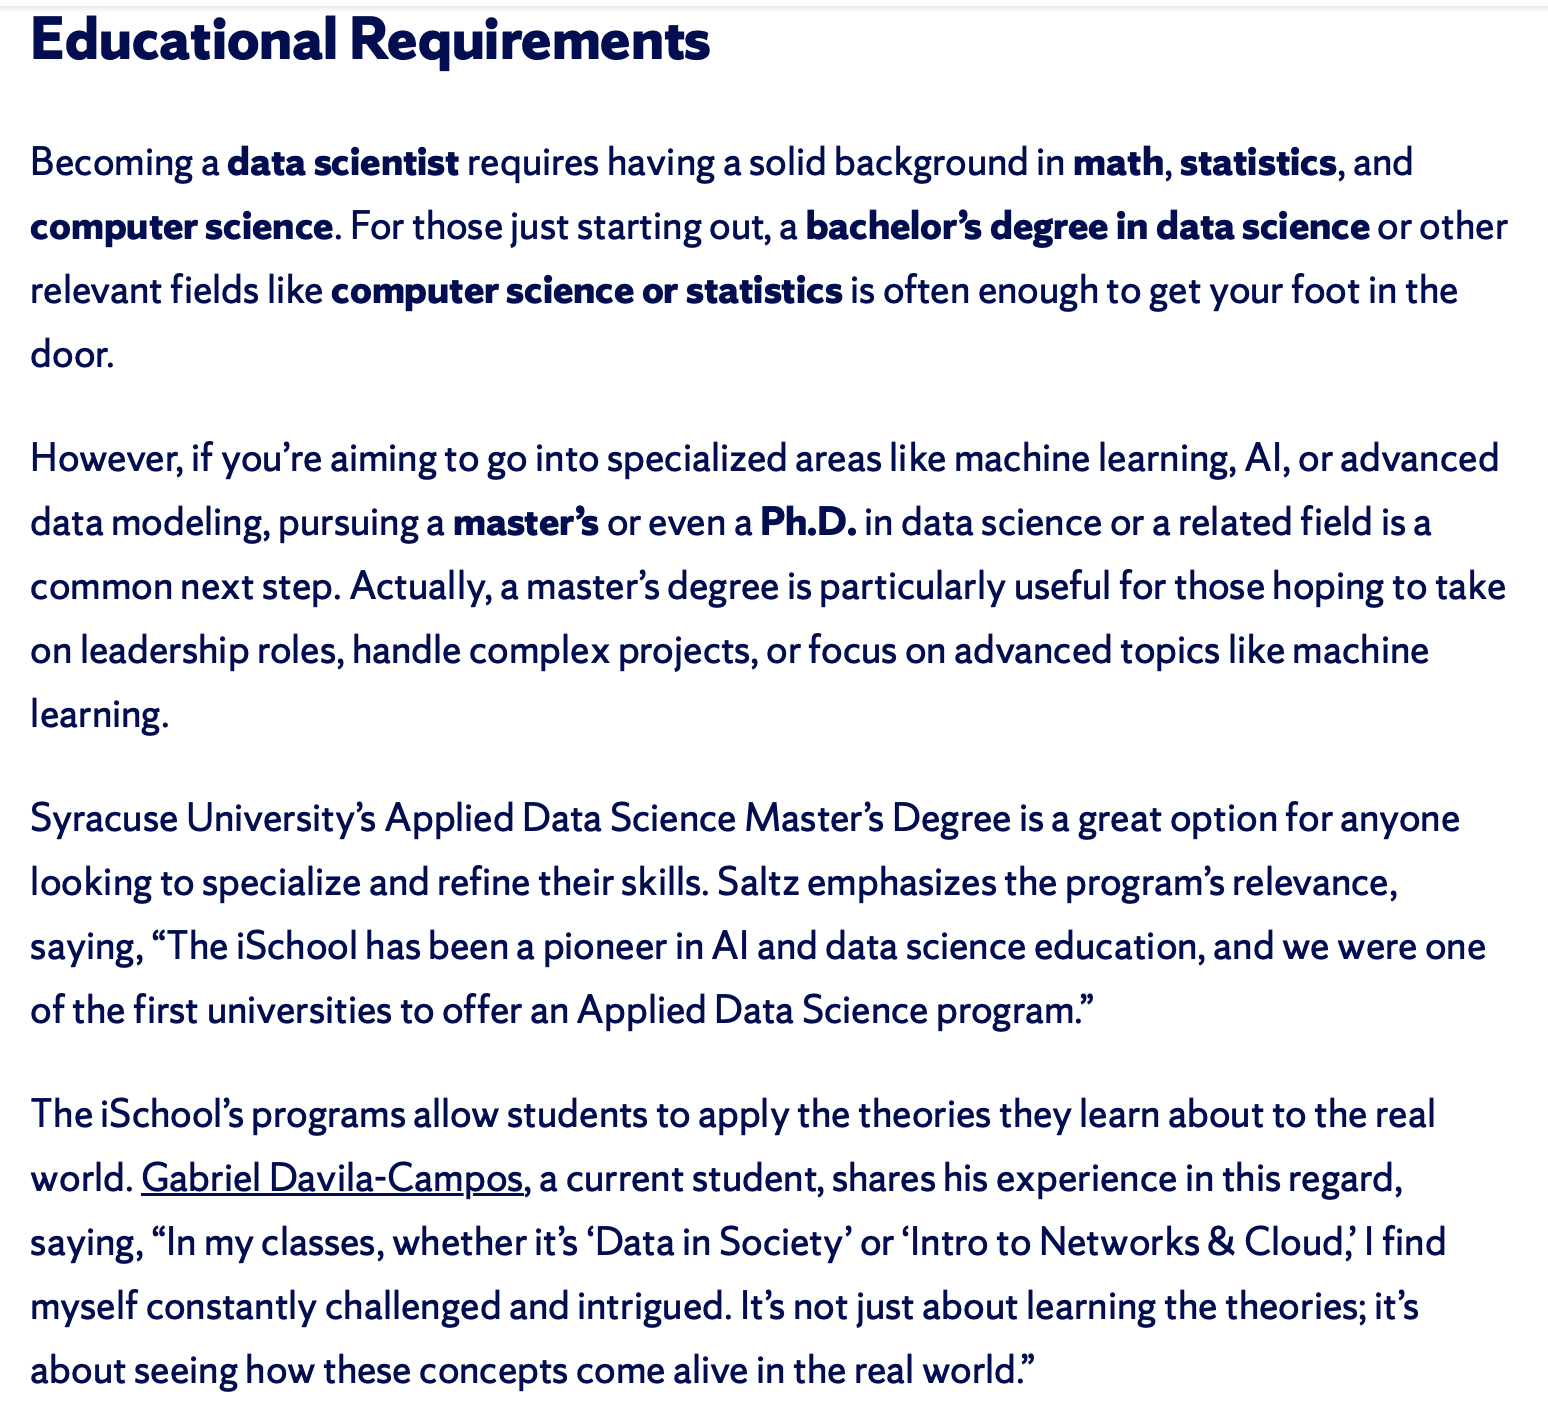

---
### **2.6 Few-Shot Prompting Classification:**

Few-shot prompting is a technique where a Large Language Model (LLM) is given a small number of labeled examples within a prompt to guide its classification. This allows the model to perform a new task with minimal data, avoiding the need for extensive fine-tuning.

In this lab, we will use the Gemini API to perform zero-shot, 1-shot, and 5-shot emotion classification:

*   **Zero-shot:** The model classifies text without any prior examples.
*   **1-shot:** The model is given one example for each emotion before classifying.
*   **5-shot:** The model is given five examples per emotion for better context.

To make our implementation robust and efficient, we are incorporating two key features:

1.  **Structured Output:** We provide the Gemini model with a specific output schema (`Emotions` class). This instructs the model to return *only* a valid emotion label (e.g., `joy`), which makes the output predictable and reliable, minimizing errors.
2.  **API Rate Handling:** The code includes a function to manage the requests-per-minute limit of the Gemini API.

We will test the model's performance on a small sample of 20 texts per emotion to ensure the process runs quickly. If the model provides an invalid response, the code will automatically retry the request until a valid classification is received.

**Prompt Structure:**
`System Instruction -> Task Description -> Examples (if not zero-shot) -> Text to Classify`


<span style="color:green">For the exercises in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

In [64]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import enum
import os
from tqdm import tqdm
import json
import time
# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting

# Schema for the output, the type enum can be used to make a pool of options if what we want is to classify our text selecting only one of them
class Emotions(enum.StrEnum):
    ANGER = 'anger'
    FEAR = 'fear'
    JOY = 'joy'
    SADNESS = 'sadness'


# Function to handle the rate limits of gemini models
def handle_rate_limit(request_count, first_request_time, max_calls_per_min):
    current_time = time.time()

    # Initialize timer on the first request of a new window
    if request_count == 0:
        first_request_time = current_time

    request_count += 1

    # If the rate limit is reached
    if request_count > max_calls_per_min:
        elapsed_time = current_time - first_request_time
        if elapsed_time < 60:
            wait_time = 60 - elapsed_time
            print(f"Rate limit of {max_calls_per_min} requests per minute reached. Waiting for {wait_time:.2f} seconds.")
            time.sleep(wait_time)

        # Reset for the new window
        request_count = 1
        first_request_time = time.time()

    return request_count, first_request_time, max_calls_per_min

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories:
"anger" | "fear" | "joy" | "sadness"
    """

    prompt = classification_instructions + "\n\n"

    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nClass: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base, system_prompt, classes, schema):
    response = None
    while not response or response not in classes:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nClass: " #The classification text will leave the emotion label to be filled in by the LLM
        try:
            result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt)
            # print(f"result: {result} \n")
            # print(f"type: {type(result)}")
            if not result:
                # In case of giving empty responses with temperature 0.0, we set a higher temperature to seek for different responses
                result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt, temperature=1.0)

            try:
                # If the result is in the correct format it can be parsed using json
                response = json.load(result)
            except:
                # In case it's not in a json friendly format
                # Deleting characters " and ' in case they appear in our response with the class of the text
                response = result.replace('"', '')
                response = response.replace("'", "")


        # except exceptions.ResourceExhausted as e:
        except Exception as e:
            print(f"Waiting to retry... Error: {e}")
            time.sleep(15)
            print(f"test_text: {test_text}")
            return classify_with_llm(test_text, prompt_base, system_prompt, classes, schema) # Retry the request


        if response not in classes:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, num_test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots)
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # System prompt for our classification model:
    system_prompt = "You are an emotion classification model for text data. Do not give empty responses, classify according to the list of possible classes."

    # Prepare to classify the test set
    results_data = []

    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=num_test_samples)

    # Variables to handle rate limit of gemini
    request_count = 0
    max_calls_per_min = 15 # Gemini 2.5 Flash Lite has this maximum set in the documentation
    first_request_time = None

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in tqdm(test_samples[emotion].iterrows(), desc=f"Processing samples for emotion: {emotion}...", total=num_test_samples):
            test_text = test_row['text']
            request_count, first_request_time, max_calls_per_min = handle_rate_limit(request_count, first_request_time, max_calls_per_min)  # Check and handle rate limit before each API call
            predicted_emotion = classify_with_llm(test_text = test_text, prompt_base = prompt_base, system_prompt = system_prompt, classes = emotions, schema = Emotions)
            # Append the results data:
            results_data.append({
                    'text': test_text,
                    'true_emotion': emotion,
                    'predicted_emotion': predicted_emotion
                })

    # Create dataframe to save the results data
    results_df = pd.DataFrame(results_data)

    # Extract just the true and predicted labels for metrics calculations
    true_labels = results_df['true_emotion']
    predictions = results_df['predicted_emotion']

    output_dir = "./DM2025-Lab2-Exercise/results/llm_classification_results"
    os.makedirs(output_dir, exist_ok=True)
    # Save the results
    filename = f"{output_dir}/results_samples_{num_test_samples}_shots_{num_shots}.csv"

    # Save the DataFrame to CSV
    results_df.to_csv(filename, index=False)
    print(f"\nResults saved to {filename}")

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))

    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions)
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')

**Important: The next part should take around 16 minutes to finish running due to API Rate Limits**

**Note:** You might see an `429 RESOURCE_EXHAUSTED` error when running the following code all at once, this is because the `current API Rate Limit handling cannot reliably find out how many requests we have left per minute` from cell to cell, there is no Gemini feature created for it to get the information from their servers. So, `if you don't want to see the error you can just wait 1 minute` after one cell finished processing. But `even if there is an error showing it is fine`, internally in the code `there is a retry that happens every 15 seconds` until we finish processing our sampled data. `The lab is designed to never reach the total rate limit per day quota.`


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories:
"anger" | "fear" | "joy" | "sadness"
    




Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:08<00:02,  1.83it/s]

Rate limit of 15 requests per minute reached. Waiting for 51.50 seconds.


Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:05<00:05,  1.93it/s]

Rate limit of 15 requests per minute reached. Waiting for 51.07 seconds.


Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:02<00:08,  1.77it/s]

Rate limit of 15 requests per minute reached. Waiting for 51.82 seconds.


Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 51.68 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [00:59<00:03,  1.57it/s]

Rate limit of 15 requests per minute reached. Waiting for 51.74 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:54<00:00,  5.74s/it]



Results saved to ./DM2025-Lab2-Exercise/results/llm_classification_results/results_samples_20_shots_0.csv
Accuracy: 52.50%
              precision    recall  f1-score   support

       anger       0.59      0.65      0.62        20
        fear       0.57      0.20      0.30        20
         joy       0.50      0.80      0.62        20
     sadness       0.47      0.45      0.46        20

    accuracy                           0.53        80
   macro avg       0.53      0.53      0.50        80
weighted avg       0.53      0.53      0.50        80



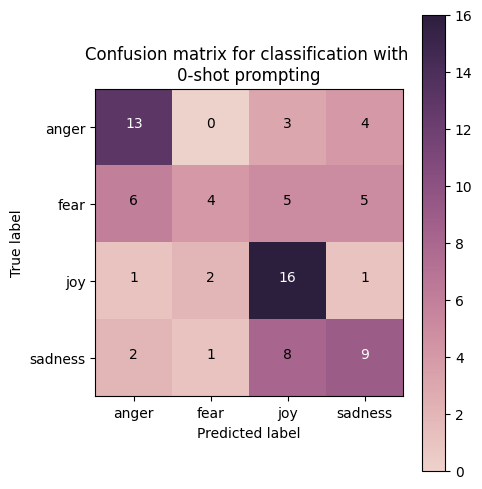

In [66]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with zero-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=0)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories:
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: @hoytschile fury road!!
Class: anger

Text: @NHLexpertpicks @usahockey USA was embarrassing to watch. When was the last time you guys won a game..? #horrible #joke
Class: fear

Text: Watch this amazing live.ly broadcast by @mrgummyking  #musically
Class: joy

Text: No one wants to win the wild card because you have to play the Cubs on the road. 
Class: sadness




Processing samples for emotion: anger...:  50%|█████     | 10/20 [00:05<00:05,  1.71it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource has been exhausted (e.g. check quota).', 'status': 'RESOURCE_EXHAUSTED'}}
Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 6.088427227s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure',

Processing samples for emotion: anger...:  55%|█████▌    | 11/20 [00:21<00:47,  5.31s/it]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 50.248612084s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:39<00:16,  3.25s/it]

Rate limit of 15 requests per minute reached. Waiting for 20.85 seconds.


Processing samples for emotion: fear...:  30%|███       | 6/20 [00:03<00:08,  1.73it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 5.602439979s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': 

Processing samples for emotion: fear...:  40%|████      | 8/20 [00:19<00:48,  4.00s/it]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 49.040645766s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:36<00:54,  5.50s/it]

Rate limit of 15 requests per minute reached. Waiting for 20.69 seconds.


Processing samples for emotion: joy...:  20%|██        | 4/20 [00:02<00:09,  1.70it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 3.69979374s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': {

Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:18<01:31,  6.11s/it]

Rate limit of 15 requests per minute reached. Waiting for 35.88 seconds.


Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 51.78 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [01:01<00:03,  1.44it/s]

Rate limit of 15 requests per minute reached. Waiting for 50.70 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:54<00:00,  5.74s/it]



Results saved to ./DM2025-Lab2-Exercise/results/llm_classification_results/results_samples_20_shots_1.csv
Accuracy: 61.25%
              precision    recall  f1-score   support

       anger       0.64      0.70      0.67        20
        fear       0.78      0.35      0.48        20
         joy       0.59      0.80      0.68        20
     sadness       0.55      0.60      0.57        20

    accuracy                           0.61        80
   macro avg       0.64      0.61      0.60        80
weighted avg       0.64      0.61      0.60        80



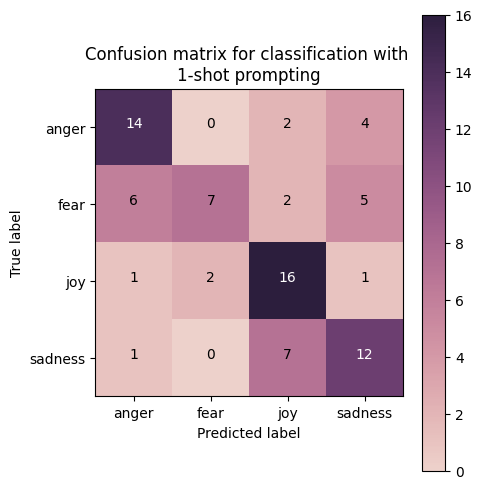

In [67]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 1-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=1)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories:
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: @hoytschile fury road!!
Class: anger

Text: Don't get #bitter get #BETTER
Class: anger

Text: I love when #girls are busy in teaching how to #pout while taking #selfie in a mall , their desication is immense #women love #perfection
Class: anger

Text: #welfarereform should not be a 'model' for .
Class: anger

Text: @everycolorbot more like every color looks the same #triggered #colorblind #offended
Class: anger

Text: @NHLexpertpicks @usahockey USA was embarrassing to watch. When was the last time you guys won a game..? #horrible #joke
Class: fear

Text: @CP24 And I hope when the police met him at the subway that they took him straight to jail 😕 #awful
Class: fear

Text: onus is on Pakistan' : @MEAIndia after #Uri #terror attack
Class: fear

Text: Wish I was a kid again. The only stressful p

Processing samples for emotion: anger...:  60%|██████    | 12/20 [00:07<00:05,  1.52it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 1.090050714s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': 

Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:39<00:25,  5.13s/it]

Rate limit of 15 requests per minute reached. Waiting for 20.07 seconds.


Processing samples for emotion: fear...:  40%|████      | 8/20 [00:05<00:07,  1.59it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 59.156211034s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:37<01:12,  7.26s/it]

Rate limit of 15 requests per minute reached. Waiting for 18.62 seconds.


Processing samples for emotion: joy...:  20%|██        | 4/20 [00:02<00:09,  1.65it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 59.744285513s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:33<02:54, 11.62s/it]

Rate limit of 15 requests per minute reached. Waiting for 19.99 seconds.


Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 50.39 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [00:59<00:03,  1.41it/s]

Rate limit of 15 requests per minute reached. Waiting for 50.63 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:53<00:00,  5.68s/it]



Results saved to ./DM2025-Lab2-Exercise/results/llm_classification_results/results_samples_20_shots_5.csv
Accuracy: 58.75%
              precision    recall  f1-score   support

       anger       0.62      0.75      0.68        20
        fear       0.57      0.40      0.47        20
         joy       0.60      0.75      0.67        20
     sadness       0.53      0.45      0.49        20

    accuracy                           0.59        80
   macro avg       0.58      0.59      0.58        80
weighted avg       0.58      0.59      0.58        80



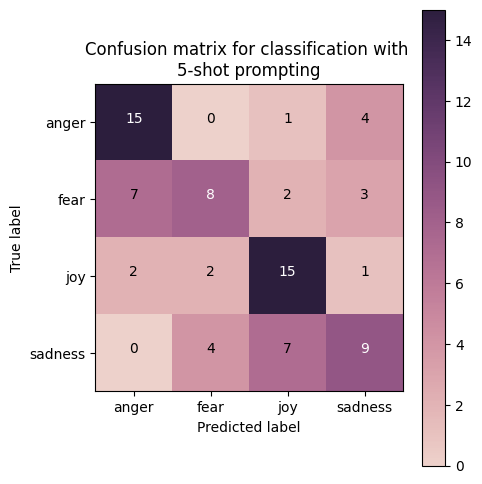

In [68]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 5-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=5)

---
##### **>>> Exercise 6 (Take home):**

Compare and discuss the overall results of the zero-shot, 1-shot and 5-shot classification.

In [70]:
# Answer here
"""
zero shot, accuracy = 52.5%
one-shot, accuracy = 61.25%
five-shots, accuracy = 58.75%

As we can observe the results from three different approached above, the result from LLM using one-shot prompting results in
  highest accuracy, which is 61.25%. Followed by five-shots, which is 58.75% and zero-shot, which is 52.5%.

In my opinion, even though the full context window is large, the model’s effective reasoning zone is still limited.
More examples like five-shots, could result in less model capacity left to focus on the actual test input, more like being bias.
So the model may substitute the last example or copy a nearest neighbor instead of perform actual reasoning.
"""

'\nzero shot, accuracy = 52.5%\none-shot, accuracy = 61.25%\nfive-shots, accuracy = 58.75%\n\nAs we can observe the results from three different approached above, the result from LLM using one-shot prompting results in\n  highest accuracy, which is 61.25%. Followed by five-shots, which is 58.75% and zero-shot, which is 52.5%.\n\nIn my opinion, even though the full context window is large, the model’s effective reasoning zone is still limited.\nMore examples like five-shots, could result in less model capacity left to focus on the actual test input, more like being bias.\nSo the model may substitute the last example or copy a nearest neighbor instead of perform actual reasoning.\n'

---
##### **>>> Exercise 7 (Take home):**

**Case Study:** Check the results' files inside the `results/llm_classification_results` directory and find cases where the **text classification improves with more examples** (pred emotion is right with examples), **cases where it does not improve** (pred emotion always wrong) and **cases where the classification got worse with more examples** (pred emotion goes from right to wrong with examples). For this you need to load the results with pandas and handle the data using its dataframe functions. Discuss about the findings.

In [108]:
# Answer here
print("Findings: \n")
classes = ['anger', 'sadness', 'joy', 'fear']
num_to_wording = {0: "Zero-shot", 1: "One-shot", 5: "Five-shots"}
shots_0 = pd.read_csv("./DM2025-Lab2-Exercise/results/llm_classification_results/results_samples_20_shots_0.csv")
shots_1 = pd.read_csv("./DM2025-Lab2-Exercise/results/llm_classification_results/results_samples_20_shots_1.csv")
shots_5 = pd.read_csv("./DM2025-Lab2-Exercise/results/llm_classification_results/results_samples_20_shots_5.csv")

# text classification improves with more examples
def check_improvement(base, change, num1, num2):
  set_index = set() #for tracking the indices that improves
  impv_cnt = 0 #count the number of improved text classification
  conf_matrix = {true: {pred:0 for pred in classes} for true in classes}

  for i in range(len(base)):
    if base['true_emotion'][i] != base['predicted_emotion'][i]:
      if change['true_emotion'][i] == change['predicted_emotion'][i]:
        set_index.add(i)
        impv_cnt += 1
        conf_matrix[base['predicted_emotion'][i]][base['true_emotion'][i]] += 1
  print(f"number of text classification improves with more examples\nfrom {num_to_wording[num1]} to {num_to_wording[num2]}: {impv_cnt}\n")
  df_cm = pd.DataFrame(conf_matrix, index=classes, columns=classes)
  print("Confusion Matrix:")
  print(df_cm, "\n")
  return set_index

index_0_1 = check_improvement(shots_0, shots_1, 0, 1)
index_0_5 = check_improvement(shots_0, shots_5, 0, 5)
index_1_5 = check_improvement(shots_1, shots_5, 1, 5)
print(f"\ntext classfication improves when moving from zero-shot to both one-shot and five-shot:\nIndex:", (index_0_1 & index_0_5))
print(f"\ntext classfication improves when moving from zero-shot to one-shot but not five-shot:\nIndex:", (index_0_1 - index_0_5))
print(f"\ntext classfication improves when moving from zero-shot to five-shot but not one-shot:\nIndex:", (index_0_5 - index_0_1))

"""
We can observe that moving from zero-shot to either one-shot or five-shot, there is around 10% of the dataset that the text classification improves.
However, from one-shot to five-shots, only 3 text classification improves, this shows that increasing the number of shots does not always improve the text classification.
"""

Findings: 

number of text classification improves with more examples
from Zero-shot to One-shot: 8

Confusion Matrix:
         anger  sadness  joy  fear
anger        0        0    2     0
sadness      1        0    1     1
joy          0        0    0     0
fear         0        1    2     0 

number of text classification improves with more examples
from Zero-shot to Five-shots: 9

Confusion Matrix:
         anger  sadness  joy  fear
anger        0        0    3     0
sadness      1        0    0     1
joy          0        0    0     0
fear         0        2    2     0 

number of text classification improves with more examples
from One-shot to Five-shots: 3

Confusion Matrix:
         anger  sadness  joy  fear
anger        0        0    1     0
sadness      1        0    0     0
joy          0        0    0     0
fear         0        1    0     0 


text classfication improves when moving from zero-shot to both one-shot and five-shot:
Index: {0, 10, 20, 24, 30, 63}

text classfic

'\nWe can observe that moving from zero-shot to either one-shot or five-shot, there is around 10% of the dataset that the text classification improves.\nHowever, from one-shot to five-shots, only 3 text classification improves, this shows that increasing the number of shots does not always improve the text classification.\n'

In [109]:
# text classification doesnt improve with more examples, stays incorrect
def check_improvement(base, change, num1, num2):
  set_index = set() #for tracking the indices that doesnt improve
  not_impv_cnt = 0 #count the number of doesnt improve text classification
  conf_matrix = {true: {pred:0 for pred in classes} for true in classes}

  for i in range(len(base)):
    if base['true_emotion'][i] != base['predicted_emotion'][i]:
      if change['true_emotion'][i] != change['predicted_emotion'][i]:
        set_index.add(i)
        not_impv_cnt += 1
        conf_matrix[base['predicted_emotion'][i]][base['true_emotion'][i]] += 1
  print(f"number of text classification doesnt improve with more examples\nfrom {num_to_wording[num1]} to {num_to_wording[num2]}: {not_impv_cnt}\n")
  df_cm = pd.DataFrame(conf_matrix, index=classes, columns=classes)
  print("Confusion Matrix:")
  print(df_cm, "\n")
  return set_index

index_0_1 = check_improvement(shots_0, shots_1, 0, 1)
index_0_5 = check_improvement(shots_0, shots_5, 0, 5)
index_1_5 = check_improvement(shots_1, shots_5, 1, 5)
# print(f"\ntext classfication doesnt improve when moving from zero-shot to both one-shot and five-shot:\nIndex:", (index_0_1 & index_0_5))
# print(f"\ntext classfication doesnt improve when moving from zero-shot to one-shot but not five-shot:\nIndex:", (index_0_1 - index_0_5))
# print(f"\ntext classfication doesnt improve when moving from zero-shot to five-shot but not one-shot:\nIndex:", (index_0_5 - index_0_1))

"""
We can observe that the percentage of text classifications that remain incorrect is approximately 37.5% across all three experiments
The interesting part is that the most common misclassification is predicting joy instead of sadness. This is an unusual behaviour since joy and sadness are contrasting emotions.
"""

number of text classification doesnt improve with more examples
from Zero-shot to One-shot: 30

Confusion Matrix:
         anger  sadness  joy  fear
anger        0        4    1     0
sadness      1        0    7     0
joy          1        1    0     2
fear         6        4    3     0 

number of text classification doesnt improve with more examples
from Zero-shot to Five-shots: 29

Confusion Matrix:
         anger  sadness  joy  fear
anger        0        4    0     0
sadness      1        0    8     0
joy          1        1    0     2
fear         6        3    3     0 

number of text classification doesnt improve with more examples
from One-shot to Five-shots: 28

Confusion Matrix:
         anger  sadness  joy  fear
anger        0        4    1     0
sadness      0        0    7     0
joy          1        1    0     2
fear         6        4    2     0 



'\nWe can observe that the percentage of text classifications that remain incorrect is approximately 37.5% across all three experiments\nThe interesting part is that the most common misclassification is predicting joy instead of sadness. This is an unusual behaviour since joy and sadness are contrasting emotions.\n'

In [110]:
# text classification got worse with more examples
def check_improvement(base, change, num1, num2):
  set_index = set() #for tracking the indices that got worse with more examples
  not_impv_cnt = 0 #count the number of got worse with more examples text classification
  conf_matrix = {true: {pred:0 for pred in classes} for true in classes}

  for i in range(len(base)):
    if base['true_emotion'][i] == base['predicted_emotion'][i]:
      if change['true_emotion'][i] != change['predicted_emotion'][i]:
        set_index.add(i)
        not_impv_cnt += 1
        conf_matrix[change['predicted_emotion'][i]][change['true_emotion'][i]] += 1
  print(f"number of text classification got worse with more examples with more examples\nfrom {num_to_wording[num1]} to {num_to_wording[num2]}: {not_impv_cnt}\n")
  df_cm = pd.DataFrame(conf_matrix, index=classes, columns=classes)
  print("Confusion Matrix:")
  print(df_cm, "\n")
  return set_index

index_0_1 = check_improvement(shots_0, shots_1, 0, 1)
index_0_5 = check_improvement(shots_0, shots_5, 0, 5)
index_1_5 = check_improvement(shots_1, shots_5, 1, 5)
print(f"\ntext classfication got worse with more examples when moving from zero-shot to both one-shot and five-shot:\nIndex:", (index_0_1 & index_0_5))
print(f"\ntext classfication got worse with more examples when moving from zero-shot to one-shot but not five-shot:\nIndex:", (index_0_1 - index_0_5))
print(f"\ntext classfication got worse with more examples when moving from zero-shot to five-shot but not one-shot:\nIndex:", (index_0_5 - index_0_1))

"""
We can see that only a few text classifications actually got worse as we added more examples, approximately <= 5% of the dataset.
Some of these misclassifications only appear in certain transitions, for instance, three examples got worse from zero-shot to five-shot
  but not from zero-shot to one-shot, and one example got worse in both transitions from zero-shot to one-shot and five-shot.
"""

number of text classification got worse with more examples with more examples
from Zero-shot to One-shot: 1

Confusion Matrix:
         anger  sadness  joy  fear
anger        0        0    1     0
sadness      0        0    0     0
joy          0        0    0     0
fear         0        0    0     0 

number of text classification got worse with more examples with more examples
from Zero-shot to Five-shots: 4

Confusion Matrix:
         anger  sadness  joy  fear
anger        0        0    1     0
sadness      0        0    0     2
joy          1        0    0     0
fear         0        0    0     0 

number of text classification got worse with more examples with more examples
from One-shot to Five-shots: 5

Confusion Matrix:
         anger  sadness  joy  fear
anger        0        0    0     0
sadness      0        0    1     3
joy          1        0    0     0
fear         0        0    0     0 


text classfication got worse with more examples when moving from zero-shot to both o

'\nWe can observe that the percentage of text classifications that remain incorrect is approximately 37.5% across all three experiments\nThe interesting part is that the most common misclassification is predicting joy instead of sadness. This is an unusual behaviour since joy and sadness are contrasting emotions.\n'

---
### **2.7 Extra LLM Related Materials:**
So this will be it for the lab, but here are some extra materials if you would like to explore:

- **How to use OpenAI ChatGPT model's API (Not Free API):** [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

- **How to Fine-tune and run local LLMs with the `unsloth` library:** [unsloth tutorials](https://docs.unsloth.ai/models/tutorials-how-to-fine-tune-and-run-llms)

- **Google's Agent Development Kit Documentation:** [ADK](https://google.github.io/adk-docs/)

- **Build AI agents with LangGraph:** [LangGraph Documentation](https://langchain-ai.github.io/langgraph/concepts/why-langgraph/)

---